In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
##https://www.kaggle.com/datasets/abhishekmamidi/air-passengers?select=AirPassengers.csv

In [3]:
df = pd.read_csv('AirPassengers.csv')

In [4]:
df.dtypes

Month         object
Passengers     int64
dtype: object

In [5]:
##We are providing inputs to tell pandas that we are trying to work with time series
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

In [6]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
## It is recommended that we make our time series reference as the index
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month')

In [9]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
##We can conveniently do slicing i.e. obtain data for a specific time period
df['1951-04-01':'1952-04-01']

,Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [11]:
df.loc['1951-04-01']

Passengers    163
Name: 1951-04-01 00:00:00, dtype: int64

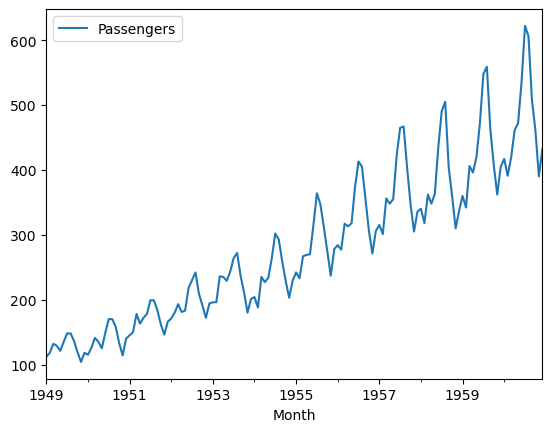

In [12]:
##Plot the time Series
df.plot()
plt.show()

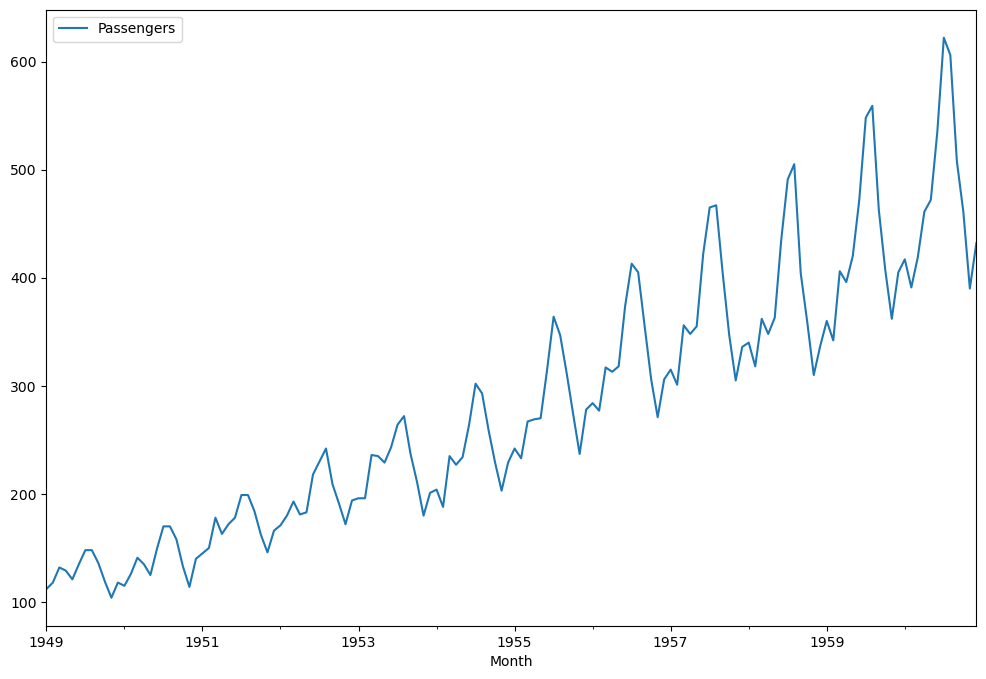

In [13]:
##Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df.plot()
plt.show()

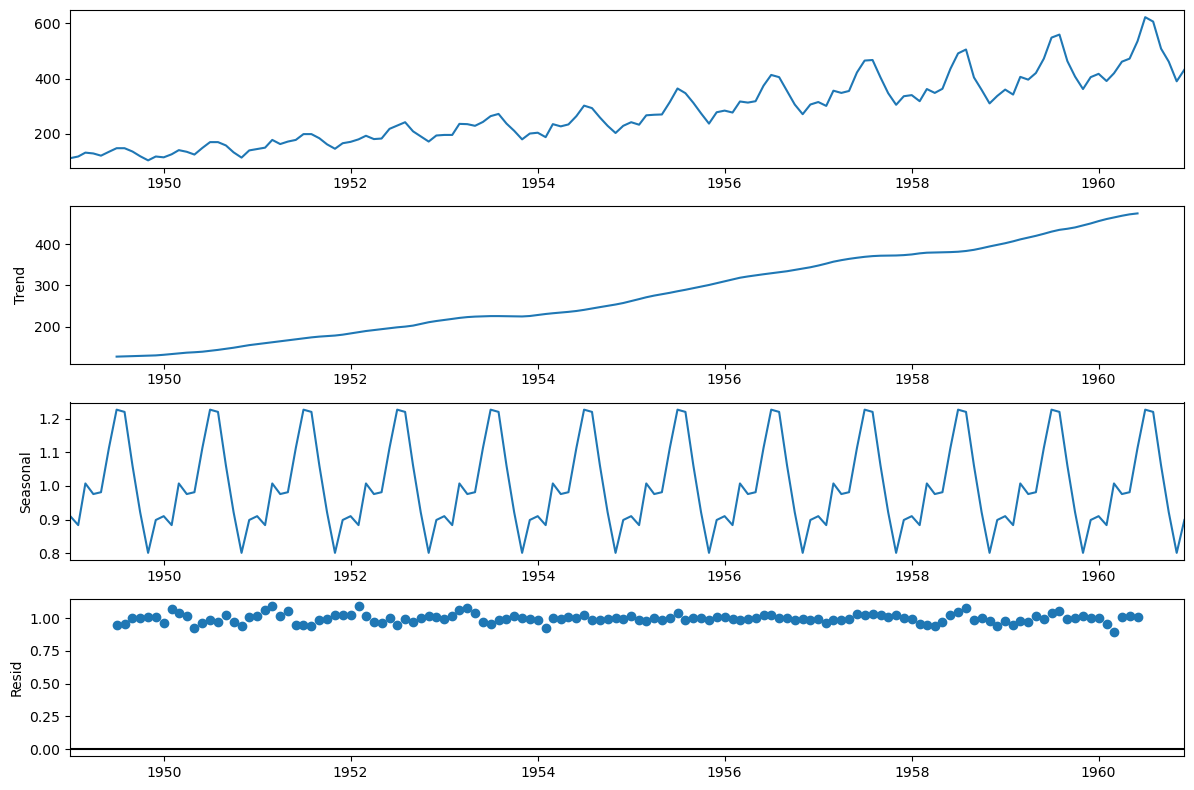

In [14]:
##Decompose the time series multiplicatively
df_mul_decompose = seasonal_decompose(df,model="multiplicative")
df_mul_decompose.plot()
plt.show()

In [15]:
##Let's try to do log transformation
df1_log = df.copy()

In [16]:
df1_log['Passengers'] = np.log(df)

In [17]:
df1_log.Passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

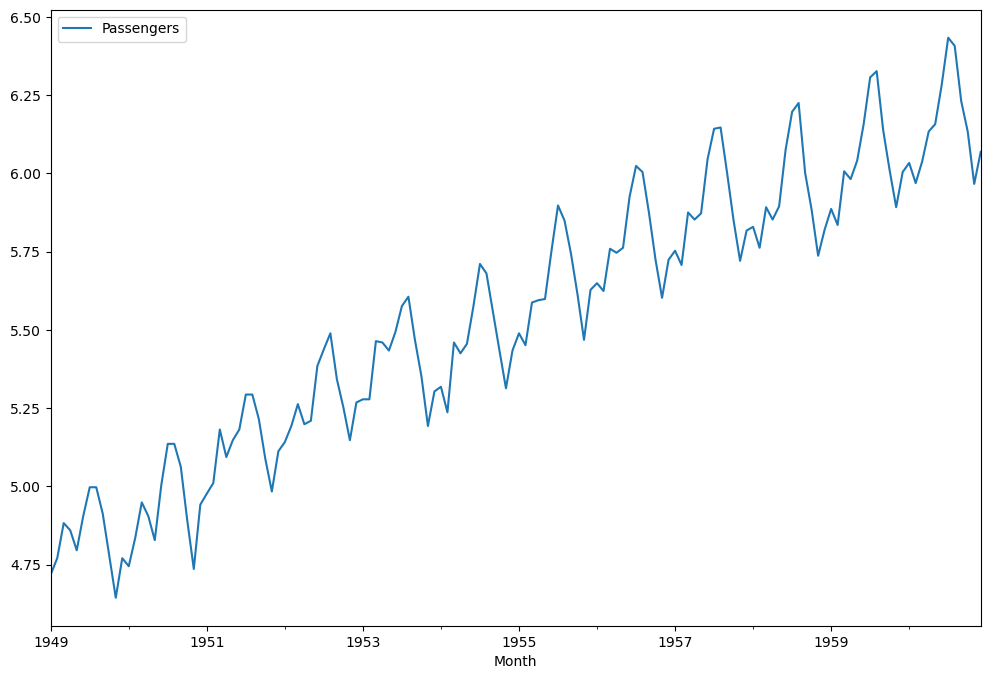

In [18]:
##Visualize the log transformed series 
df1_log.plot()
plt.show()

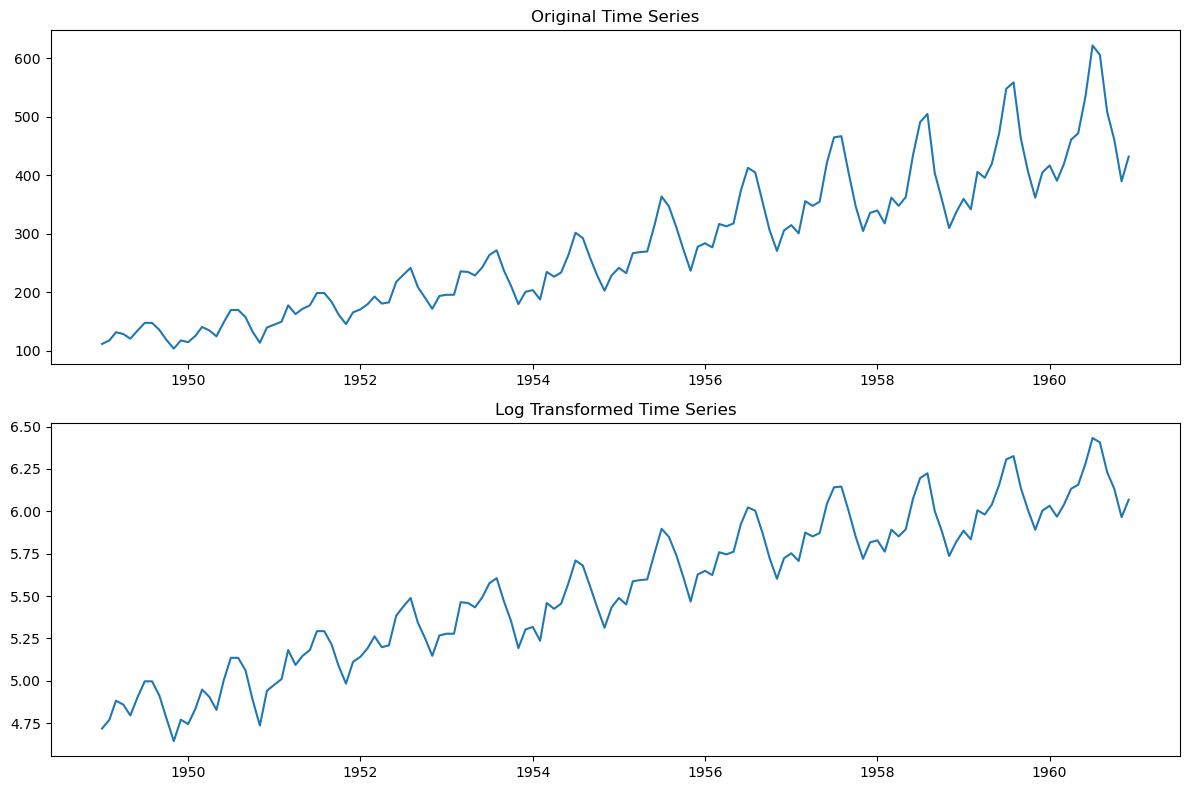

In [19]:
##Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()
